# Compare the cycling networks of two European cities: Berlin 🇩🇪 and Paris 🇫🇷

Author: Frédéric DITH  |  Creation date: 2023-10-31  |  Last updated: 2023-10-31

## Context

This data exploration self-assignment was born out of a personal interest for the topic. I've lived in both cities (7 years in Paris, 10 years in Berlin), which allowed me to develop very subjective impressions and observations regarding the quality of their respective cycling networks. I wanted to explore this topic through data, in order to gain a different perspective on it. I also hope this project can display some of the skills I've gained during my learning journey, such as:
- Finding and retrieving data from various sources
- Data manipulation and transformation, in order to allow for comparison
- Analysis of the newly assembled dataset

## Questions to answer
- Which of these two cities has the most cycling roads?
- Which of these two cities has the most cycling roads, relative to their size (or length of their total road network)?
- In each of these cities, which districts have the most cycling roads, relative to their size (or length of their total road network)? 

## Summary of findings

- Berlin's cycling network is approximately 4 times longer than Paris' cycling network (1,766.5km for Berlin, 459.38km for Paris)
- However, Berlin and Paris are very different in terms of size (Berlin is approximately 8 times larger than Paris in terms of surface area, and its entire road network is approximately 4 times longer). When factoring in the total length of the roads each city has, the ratio of cycling roads they have is very similar:
    - Berlin has a total of 6,635.75km of roads, and 1,766.5km of cycling roads. Its ratio of cycling roads to roads is **26.62%**
    - Paris has a total of 1,565km of roads, and 459.38km of cycling roads. Its ratio of cycling roads to roads is **29.34%**
- **At a district level**
    - Berlin: the three _Bezirke_ that have the most cycling roads relative to their size are Friedrichshain-Kreuzberg, Mitte and Spandau
    - Paris: the three _arrondissements_ that have the most cycling roads relative to their size are the 4th, the 19th and the 10th
- **Data recency**: Paris' cycling network dataset is constantly updated, while the Berlin's dataset was last updated in september 2018. Both cities have seen a lot of progress and development over the past years, and obtaining a more up-to-date dataset for Berlin would allow for a better comparison. 



## Methodology
- **Data collection**: for each city, find the best possible data in order to compare the size of their cycling networks. I chose to collect the length of all the roads of the city, the length of all the cycling roads in each city, and the surface areas. All this data should be available at a district level (_Bezirke_ for Berlin, and _arrondissements_ for Paris), in order to allow for a more granular comparison.
- **Data transformation**: both cities offer a large number of datasets that are organized and written differently. At this stage, we need to transform the data from both cities in a format that will allow us to compare them equally.


## Potential next steps
We've used the administrative districts of each city for this project, but given the large difference in size, it would be interesting to run the same analysis on areas of similar sizes. Two possibilities could be to compare:
- [Berlin's Ringbahn area](https://de.wikipedia.org/wiki/Berliner_Ringbahn) (approx. 8,800Ha surface area) to [Paris' Peripherique area](https://en.wikipedia.org/wiki/Boulevard_P%C3%A9riph%C3%A9rique) (approx. 8,700Ha surface area). This analysis would then be focused on the "urban core" of each city, which is likely to be more dense, in terms of cycling infrastructures
- Berlin city (what we used) to Ile-de-France (Paris and the five neighboring regions). This project would basically "zoom out" and look at a much larger comparable area. We would need to pay attention to the fact that the new french area would include multiple large cities, in addition to Paris itself.



## Sources

| dataset                           | url                                                                                                                                                  | last updated |
|-----------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|--------------|
| Berlin road network               | [Berlin Open Data - Strassenabschnitte](https://daten.odis-berlin.de/de/dataset/detailnetz_strassenabschnitte/)                                      | 2021-02-24   |
| Berlin cycling network            | [Berlin Open Data - Radverkehrsanlagen](https://daten.odis-berlin.de/archive/radverkehrsanlagen/)                                                    | 2018-09-10   |
| Berlin districts (Bezirke)        | [Berlin Open Data - Ortsteile](https://daten.odis-berlin.de/de/dataset/ortsteile/)                                                                   | 2020-07-16   |
| Paris road network                | [Paris Open Data - Dénominations des emprises des voies actuelles](https://opendata.paris.fr/explore/dataset/denominations-emprises-voies-actuelles) | 2023-10-26   |
| Paris cycling network             | [Paris Open Data - Réseau des itinéraires cyclables](https://opendata.paris.fr/explore/dataset/reseau-cyclable)                                      | 2023-10-30   |
| Paris districts (arrondissements) | [Paris Open Data - Arrondissements](https://opendata.paris.fr/explore/dataset/arrondissements)                                                       | 2016-03-04   |


In [701]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests

%pip install geopandas
import geopandas as gpd

Note: you may need to restart the kernel to use updated packages.


## Berlin road data

In this first step, we want to collect the total length of all the roads of every single _Bezirk_ in Berlin. We're calling this dataset B1.

In [702]:
b1 = pd.read_csv(r"https://tsb-opendata.s3.eu-central-1.amazonaws.com/detailnetz_strassenabschnitte/Detailnetz-Strassenabschnitte.csv")
b1 = b1[["element_nr", "bezirk", "stadtteil", "laenge"]]
b1.rename(columns={"STOR_NAME": "bezirk", "laenge": "B_roads"}, inplace=True)
b1 = b1.groupby(["bezirk"]).sum(numeric_only=True)
b1

,B_roads
bezirk,
Charlottenburg-Wilmersdorf,560161.832412
Friedrichshain-Kreuzberg,209889.542100
Lichtenberg,402288.191151
Marzahn-Hellersdorf,614454.638334
Mitte,412318.647728
Neukölln,431913.036812
Pankow,795243.069698
Reinickendorf,616506.107514
Spandau,525837.850256


## Berlin cycling roads data

Next, we did the same thing with the cycling roads in Berlin. (Note: the data is only available in a [GeoJSON file](https://tsb-opendata.s3.eu-central-1.amazonaws.com/0_archive/radverkehrsanlagen/Radverkehrsanlagen.geojson.zip); this is why we imported geopandas earlier). We're calling this dataset B2.

In [703]:
b2 = gpd.read_file("https://tsb-opendata.s3.eu-central-1.amazonaws.com/0_archive/radverkehrsanlagen/Radverkehrsanlagen.geojson.zip")
b2 = b2[["gml_id", "STOR_NAME", "ORTSTL", "LAENGE"]]
b2.rename(columns={"STOR_NAME": "bezirk", "LAENGE": "B_cycle"}, inplace=True)
b2 = b2.groupby(["bezirk"]).sum(numeric_only=True)
b2

,B_cycle
bezirk,
-,1737.0
Charlottenburg-Wilmersdorf,169577.9
Friedrichshain-Kreuzberg,90134.7
Lichtenberg,100257.0
Marzahn-Hellersdorf,118019.1
Mitte,169677.4
Neukölln,104444.0
Pankow,161242.6
Reinickendorf,140794.4


## Berlin combined data

Now that we have the lengths of all roads, and all the cycling roads, we combine them into a single dataframe, and add a simple calculation as a 3rd column (cycling roads / total roads). We're calling this dataset B3.

In [704]:
b3 = b1.merge(b2, on="bezirk", how="outer")
b3['ratio'] = b3["B_cycle"] / b3["B_roads"]
b3 = b3.sort_values(by="ratio", ascending=False)
b3 = b3.reset_index()
b3

,bezirk,B_roads,B_cycle,ratio
0,Friedrichshain-Kreuzberg,209889.542100,90134.7,0.429439
1,Mitte,412318.647728,169677.4,0.411520
2,Spandau,525837.850256,165372.5,0.314493
3,Charlottenburg-Wilmersdorf,560161.832412,169577.9,0.302730
4,Tempelhof-Schöneberg,491818.832277,148588.8,0.302121
5,Steglitz-Zehlendorf,755203.860300,194599.2,0.257678
6,Lichtenberg,402288.191151,100257.0,0.249217
7,Treptow-Köpenick,820117.597831,202059.2,0.246378
8,Neukölln,431913.036812,104444.0,0.241817
9,Reinickendorf,616506.107514,140794.4,0.228375


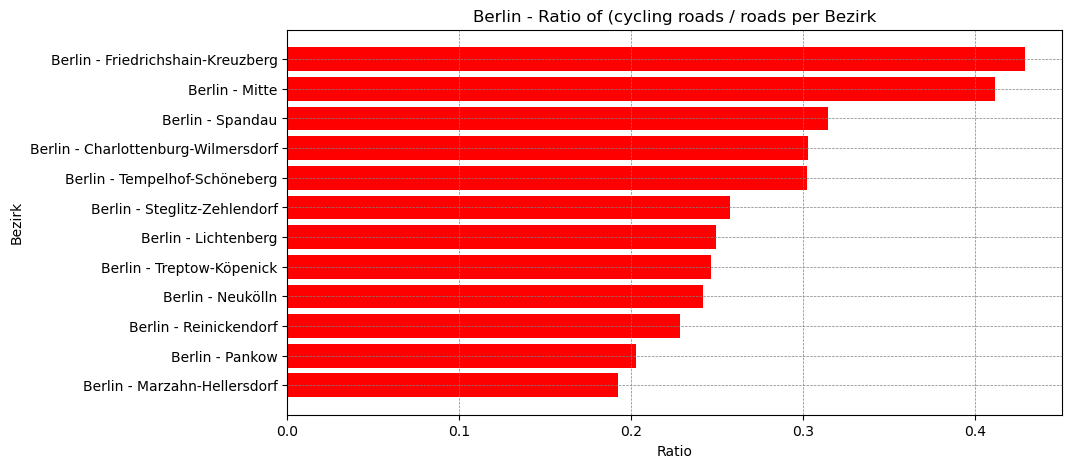

In [718]:
# we can put this data into a simple bar chart, sorted by ratio
b3 = b3.sort_values('ratio')
plt.figure(figsize=(10, 5))
plt.barh(b3['bezirk'],b3['ratio'], color='red')
plt.title('Berlin - Ratio of (cycling roads / roads per Bezirk')
plt.xlabel('Ratio')
plt.ylabel('Bezirk')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()


## Paris road data

Note: The city of Paris gives [free access to a lot of data](https://opendata.paris.fr/pages/catalogue/?disjunctive.theme&disjunctive.publisher&sort=modified) in multiple formats. However the API limits the number of results we can use for each query. While I initally wanted to use the API for this project, I had to export the data and use .csv files instead.

Data transformation: two extra steps were required for this data
- remove all roads that do not have length data. This was causing an error when adding up all numbers
- format the _arrondissement_ string: it was provided in a string format that did not allow to group rows properly. I've converted them to a float that is good enough for our purpose.

In [706]:
p1 = pd.read_csv("data/paris_voies.csv", sep=';')
p1.rename(columns={"Identifiant": "id", "Dénomination complète": "full_name", "Type voie": "type_voie", "Arrondissement": "arrdt", "Longueur voie": "P_roads"}, inplace=True)
p1.dropna(subset='P_roads', inplace=True) #remove all the roads that do not have length
p1['arrdt'] = p1['arrdt'].str.extract('(\d+)')# extract the numerical value
p1['arrdt'] = p1['arrdt'].astype(float)
p1['P_roads'] = p1['P_roads'].astype(float)
p1 = p1.drop('id', axis=1)
p1 = p1_.groupby(["arrdt"]).sum(numeric_only=True)
p1 = p1.reset_index()
p1


,arrdt,P_roads
0,1.0,54573.0
1,2.0,21599.0
2,3.0,26155.0
3,4.0,26510.0
4,5.0,45358.0
5,6.0,41563.0
6,7.0,60425.0
7,8.0,72973.0
8,9.0,44529.0
9,10.0,44191.0


## Paris cycling roads data

Note: [the Paris' dataset](https://opendata.paris.fr/explore/dataset/reseau-cyclable/table) available for our purpose is much more comprehensive than the one provided by Berlin, and was also very different in its structure. It contains:
- an overall difference in _what is and isn't_ a cycling lane. A space shared between pedestrians and cyclists that can be ridden both ways counts as two distinct lanes, and therefore counts the length twice.
- more types of places (eg. "space shared between pedestrians and cyclists", "one way lanes in opposite direction to regular traffic")
- more parameters (eg. "one or two way lanes", "speed limit"...)

As a result, Paris overall counts many more cycling lanes than Berlin does. When accounting for every single row of the Paris' dataset, I ended up with totals that were longer than the total length of all roads, so I made the decision to only keep two types:
- _Pistes cyclables_ ("true" lanes, separated from traffic)
- _Bandes cyclables_ (shared lanes on the road, marked with paint). 

The excluded types are:
- _Autres itinéraires cyclables_ (translates to 'other cycling-friendly areas'. Contains pedestrian areas and plazas, one-way-non-marked lanes...)
- _Couloirs de bus ouverts aux vélos_ (translates to 'cycling-friendly bus lanes') 

In [707]:
p2 = pd.read_csv("data/paris_reseau_cyclable_5(restricted).csv", sep=';')
p2.rename(columns={"cycling_length": "P_cycle"}, inplace=True)
p2 = p2.groupby(["arrdt"]).sum(numeric_only=True)
p2


,P_cycle
arrdt,
1.0,8991.727269
2.0,4436.766267
3.0,2796.538346
4.0,12529.050818
5.0,9058.956626
6.0,7256.343731
7.0,13593.869119
8.0,22415.126298
9.0,9115.805468


## Paris combined data


In [708]:
p3 = p1.merge(p2, on="arrdt", how="outer")
p3['ratio'] = p3["P_cycle"] / p3["P_roads"]
p3 = p3.sort_values(by="ratio", ascending=False)
p3['arrdt'] = p3['arrdt'].astype(int)
p3


,arrdt,P_roads,P_cycle,ratio
3,4,26510.0,12529.050818,0.472616
18,19,94447.0,42337.391900,0.448266
9,10,44191.0,19289.594770,0.436505
12,13,101888.0,40211.676848,0.394665
11,12,187701.0,72405.621208,0.385750
19,20,91653.0,30371.579727,0.331376
13,14,80640.0,24867.024510,0.308371
7,8,72973.0,22415.126298,0.307170
14,15,115089.0,32790.381342,0.284913
10,11,67666.0,17423.387853,0.257491


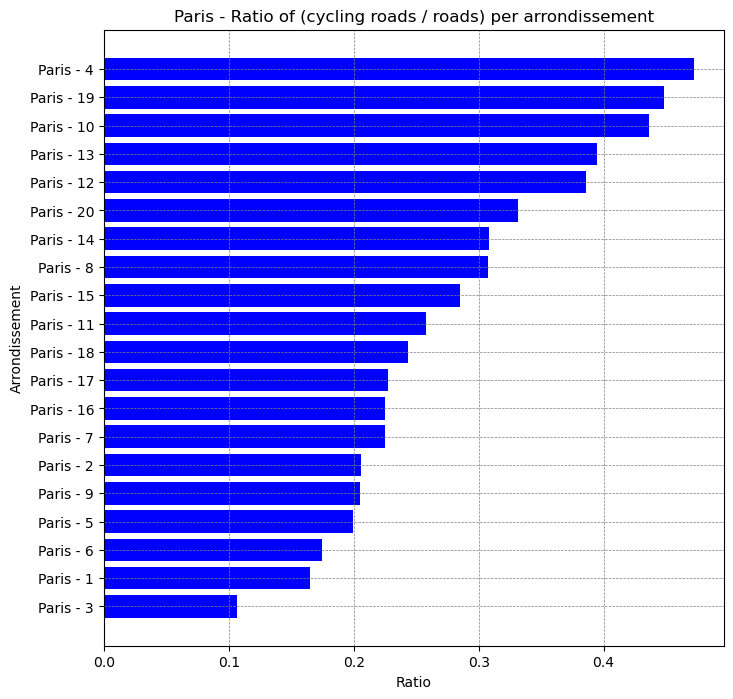

In [714]:
# chart
p3 = p3.sort_values('ratio')
plt.figure(figsize=(8, 8))
plt.barh(p3['arrdt'],p3['ratio'], color='blue')
plt.title('Paris - Ratio of (cycling roads / roads) per arrondissement')
plt.xlabel('Ratio')
plt.ylabel('Arrondissement')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()


# Combined data for both cities

In [710]:
# make a single chart for both cities
b4 = b3
b4['city'] = 'BER' # add a city column (will be useful to color the bars)
b4['bezirk'] = b4['bezirk'].apply(lambda x: 'Berlin - ' + str(x)) # add "Berlin' to the bezirk name for readability
b4 = b4.rename(columns={'bezirk': 'district'})
b4_sub = b4[['district','ratio','city']] # only keep district and ratio

# do the same for paris
p4 = p3
p4['city'] = 'PAR'
p4['arrdt'] = p4['arrdt'].apply(lambda x: 'Paris - ' + str(x))
p4 = p4.rename(columns={'arrdt': 'district'})
p4_sub = p4[['district','ratio','city']] # only keep district and ratio

#combine b4_sub and p4_sub
combined = pd.concat([b4_sub, p4_sub])
combined = combined.dropna(subset=['ratio'])
combined = combined.reset_index(drop=True)
combined = combined.sort_values(by="ratio", ascending=False)
combined


,district,ratio,city
31,Paris - 4,0.472616,PAR
30,Paris - 19,0.448266,PAR
29,Paris - 10,0.436505,PAR
11,Berlin - Friedrichshain-Kreuzberg,0.429439,BER
10,Berlin - Mitte,0.411520,BER
28,Paris - 13,0.394665,PAR
27,Paris - 12,0.385750,PAR
26,Paris - 20,0.331376,PAR
9,Berlin - Spandau,0.314493,BER
25,Paris - 14,0.308371,PAR


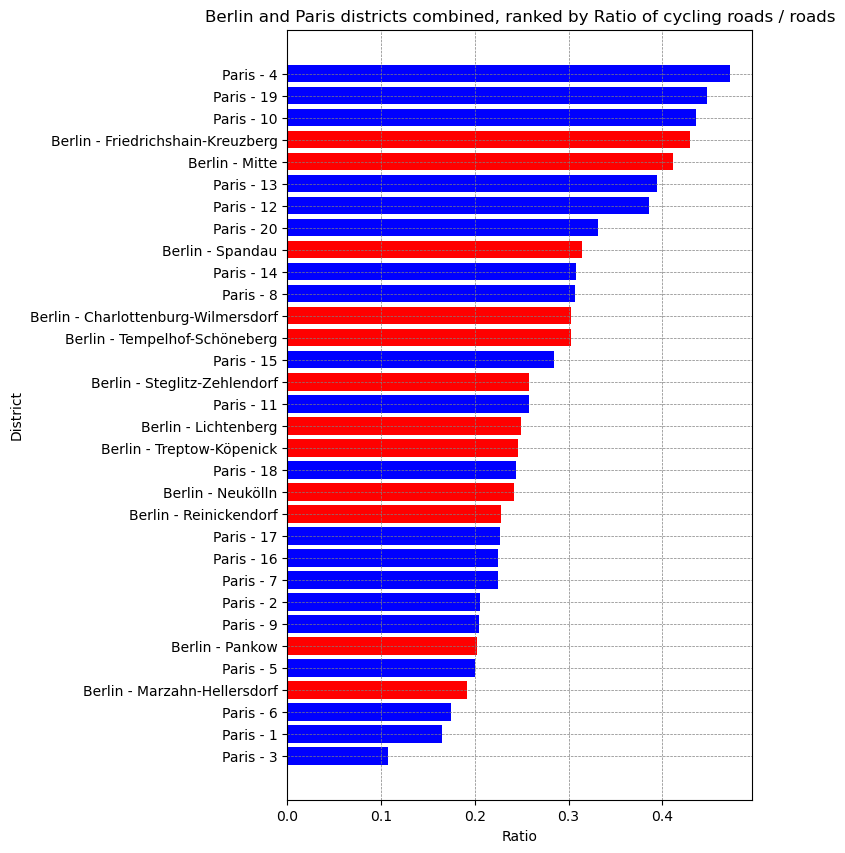

In [711]:
# Combined chart for both cities
combined = combined.sort_values('ratio')
plt.figure(figsize=(6, 10))
color_mapping = lambda x: 'blue' if x == 'PAR' else 'red'
combined['color'] = combined['city'].apply(color_mapping)
plt.barh(combined['district'],combined['ratio'], color=combined['color'])
plt.title('Berlin and Paris districts combined, ranked by Ratio of cycling roads / roads')
plt.xlabel('Ratio')
plt.ylabel('District')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

# Other measures


## Global data for both cities

In [712]:
B_total = round(float(b3['B_roads'].sum())/1000, 2)
print('Total length of Berlin roads: '+ str(B_total)+'km')

B_cycle = round(float(b3['B_cycle'].sum())/1000, 2)
print('Total length of Berlin cycling roads: '+ str(B_cycle)+'km')

BER_score = round(float(100 * B_cycle / B_total), 2)
print('Overall ratio for Berlin: '+ str(BER_score) + '%')

print('')

P_total = round(float(p3['P_roads'].sum())/1000, 2)
print('Total length of Paris roads: '+ str(P_total)+'km')

P_cycle = round(float(p3['P_cycle'].sum())/1000, 2)
print('Total length of Paris cycling roads: '+ str(P_cycle)+'km')

PAR_score = round(float(100 * P_cycle / P_total), 2)
print('Overall ratio for Paris: '+ str(PAR_score) + '%')

Total length of Berlin roads: 6635.75km
Total length of Berlin cycling roads: 1766.5km
Overall ratio for Berlin: 26.62%

Total length of Paris roads: 1565.65km
Total length of Paris cycling roads: 459.38km
Overall ratio for Paris: 29.34%


## Area data for both cities

In [715]:
#BERLIN

B_area = pd.read_csv("https://tsb-opendata.s3.eu-central-1.amazonaws.com/ortsteile/lor_ortsteile.csv")
B_area = B_area[['OTEIL','BEZIRK','FLAECHE_HA']]
B_area = B_area.groupby("BEZIRK").sum(numeric_only=True)
B_area.rename(columns={'BEZIRK':'bezirk', 'FLAECHE_HA':'area_ha'}, inplace=True)

B_total_area = round(float(B_area['area_ha'].sum()),2)
B_avg_area = round(float(B_area['area_ha'].mean()),2)
print('Total Berlin area: '+ str(B_total_area) + 'Ha')
print('Average area of a Berlin district: '+ str(B_avg_area) + 'Ha')

print('')

#PARIS
P_area = pd.read_csv("data/paris_arrondissements.csv", sep=';')
P_area = P_area[['Numéro d’arrondissement','Surface']]
P_area.rename(columns={'Numéro d’arrondissement': 'arrdt', 'Surface': 'area_ha'}, inplace=True)
P_area['area_ha'] = P_area['area_ha']/10000

P_total_area = round(float(P_area['area_ha'].sum()),2)
P_avg_area = round(float(P_area['area_ha'].mean()),2)
print('Total Paris area: '+ str(P_total_area) + 'Ha')
print('Average area of a Paris district: '+ str(P_avg_area) + 'Ha')


Total Berlin area: 88773.12Ha
Average area of a Berlin district: 7397.76Ha

Total Paris area: 10537.28Ha
Average area of a Paris district: 526.86Ha
